In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/H.A/Downloads/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('E45',inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
from sklearn.preprocessing import LabelEncoder
cleanup_num={
    'Sex':{"male":1, "female":1}
}
df.replace(cleanup_num,inplace=True)
df['Cabin']= LabelEncoder().fit_transform(df['Cabin'])
df['Embarked']= LabelEncoder().fit_transform(df['Embarked'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,63,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,63,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,63,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,63,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,63,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,22,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,63,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,63,2


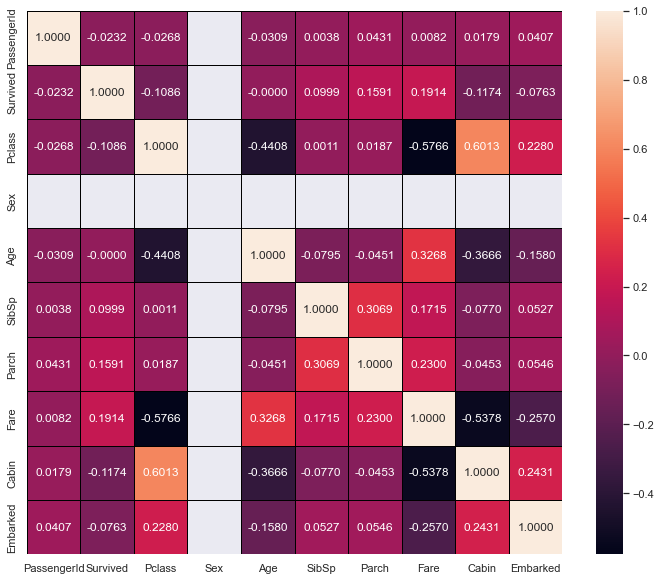

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [11]:
#Choosing the features as x and the target as y
x=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']]
y=df['Survived']
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=25) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.6547619047619048


In [7]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.63
Accuracy for k= 2 is: 0.64
Accuracy for k= 3 is: 0.63
Accuracy for k= 4 is: 0.64
Accuracy for k= 5 is: 0.65
Accuracy for k= 6 is: 0.67
Accuracy for k= 7 is: 0.63
Accuracy for k= 8 is: 0.65
Accuracy for k= 9 is: 0.63
Accuracy for k= 10 is: 0.62
Accuracy for k= 11 is: 0.61
Accuracy for k= 12 is: 0.62
Accuracy for k= 13 is: 0.63
Accuracy for k= 14 is: 0.61
Accuracy for k= 15 is: 0.63
Accuracy for k= 16 is: 0.63
Accuracy for k= 17 is: 0.56
Accuracy for k= 18 is: 0.56
Accuracy for k= 19 is: 0.57
Accuracy for k= 20 is: 0.58
Accuracy for k= 21 is: 0.58
Accuracy for k= 22 is: 0.58
Accuracy for k= 23 is: 0.61
Accuracy for k= 24 is: 0.63
Accuracy for k= 25 is: 0.65
Accuracy for k= 26 is: 0.65
Accuracy for k= 27 is: 0.56
Accuracy for k= 28 is: 0.6
Accuracy for k= 29 is: 0.56


Text(0, 0.5, 'Testing Accuracy')

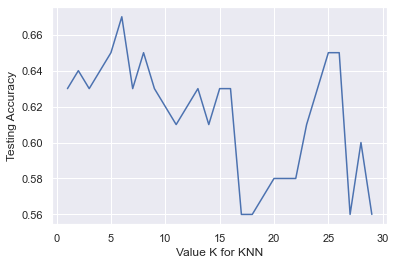

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')